In [1]:
import pandas as pd
df=pd.read_csv('Sales_data_zone_wise.csv') # reading the dataset
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
df.isnull().sum().sum() # checking for presence of any null values in the dataset

0

#### XYZ Company has offices in four different zones. The company wishes to investigate the following :

#### 1) The mean sales generated by each zone

In [4]:
df.mean(numeric_only=True).round(2) # finding the mean sales generated by Zones(A,B,C,D) upto 2 decimal places

Zone - A    1540493.14
Zone - B    1755559.59
Zone - C    1772871.03
Zone - D    1842926.76
dtype: float64

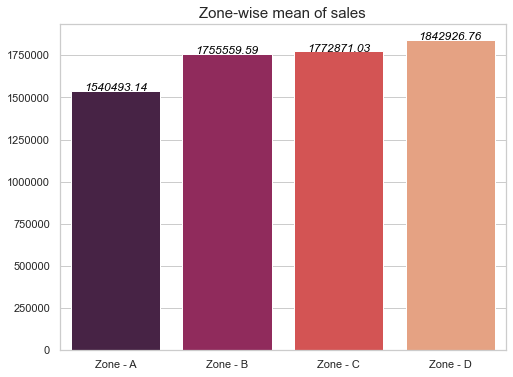

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

# Barplot representing above data of mean of zone-wise sales
sns.set(rc = {'figure.figsize':(8,6)}, style='whitegrid')
ax=sns.barplot(data=df, estimator=mean, ci=None, palette='rocket')
means=df.mean(numeric_only=True).round(2)
for xtick in ax.get_xticks():
    ax.text(xtick,means[xtick].round(2), means[xtick].round(2),ha='center',size=12,color='black',style='italic',weight='regular')
plt.title("Zone-wise mean of sales", fontsize=15)
plt.ticklabel_format(style='plain', axis='y')

The highest average sales is for Zone D and the lowest average sales is for Zone A.
For Zone B and Zone C the sales are relatively the same.

#### 2) Total sales generated by all the zones for each month

In [10]:
df1=df.copy() 
df1["Total_sales"]=df1.sum(axis=1, numeric_only=True) # caluclating the total sales across all zones for each month
df1

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


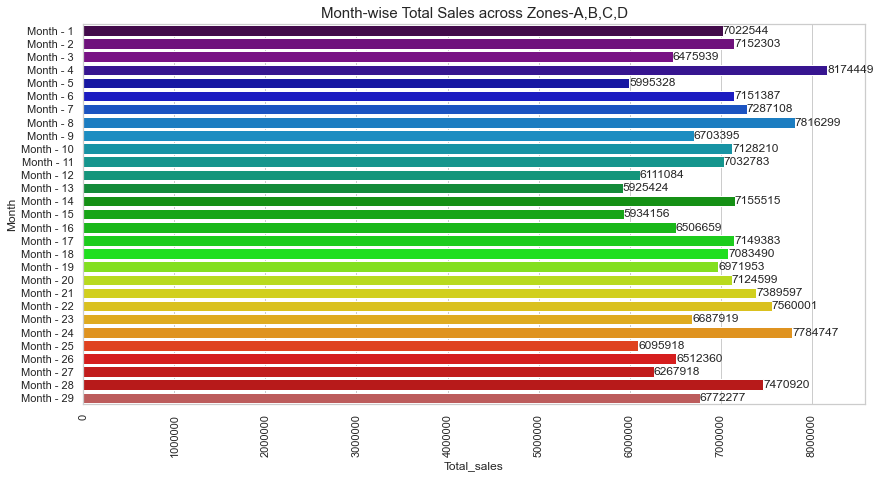



The average of total sales for 29 months is  6911850.52 

The highest total sales of  8174449  was recorded for  Month - 4 

The lowest total sales of  5925424  was recorded for  Month - 13


In [44]:
# horizontal barplot for representation of above data on monthly total sales
avg_totalsales=df1['Total_sales'].mean()
max_sales_index=df1[['Total_sales']].idxmax()
min_sales_index=df1[['Total_sales']].idxmin()
sns.set(rc = {'figure.figsize':(14,7)}, style='whitegrid')
ax=sns.barplot(x="Total_sales",y="Month",data=df1, ci=None, palette='nipy_spectral')    
plt.title("Month-wise Total Sales across Zones-A,B,C,D", fontsize=15)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt = '%d')
plt.show()
print("\n\nThe average of total sales for 29 months is ",round(avg_totalsales,2),"\n")
print("The highest total sales of ", df1['Total_sales'].max(), " was recorded for ",df1.iloc[max_sales_index]['Month'].item(),"\n")
print("The lowest total sales of ", df1['Total_sales'].min(), " was recorded for ",df1.iloc[min_sales_index]['Month'].item())

#### 3) Check whether all the zones generate the same amount of sales

To check if the same amount of sales is generated for all the zones(Zone-A,B,C,D) we make use of one-way ANOVA

Null Hypothesis: The mean sales amount generated for all 4 zones(Zone-A,B,C,D) are equal 

Alternate Hypothesis: The mean sales amount generated for atleast one zone is different from the remaining zones

Consider a level of significance(alpha) of 5% (0.05)

In [43]:
alpha=0.05
ndf=df.shape[1]-2
ddf=df.shape[0]*(df.shape[1]-1)-(df.shape[1]-1)
from scipy.stats import f_oneway,f
f_critical=f.ppf(q=1-alpha, dfn=ndf, dfd=ddf)
print("f-critical=",f_critical," , \u03B1=",alpha)
f_statistic, p_value=f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print("\n\033[1mFrom one-way ANOVA test:\033[0m")
print("f-statistic=",f_statistic," , p-Value=",p_value)
print("\n\033[1mConclusion:\033[0m\n")
print("\n\033[1mBased on p-value:\033[0m\n")
if p_value<alpha:
    print("As the p-value is less than the \u03B1(0.05) we will reject the null hypothesis and thereby accept the alternate  hypothesis that the amount of sales generated by atleast one zone is different from the rest")
else:
    print("We will accept the null hypothesis and conclude that on an average the same amount of sales is generated by all 4 zones ") 
print("\n\033[1mBased on f-statistic:\033[0m\n")
if f_statistic>f_critical:
    print("As the f-statistic exceeds the f-critical value we will reject the null hypothesis and thereby accept the alternate hypothesis that the amount of sales generated by atleast one zone is different from the rest")
else:
    print("We will accept the null hypothesis and conclude that on an average the same amount of sales is generated by all 4 zones ") 

f-critical= 2.6856434512366034  , α= 0.05

From one-way ANOVA test:
f-statistic= 5.672056106843581  , p-Value= 0.0011827601694503335

Conclusion:


Based on p-value:

As the p-value is less than the α(0.05) we will reject the null hypothesis and thereby accept the alternate  hypothesis that the amount of sales generated by atleast one zone is different from the rest

Based on f-statistic:

As the f-statistic exceeds the f-critical value we will reject the null hypothesis and thereby accept the alternate  hypothesis that the amount of sales generated by atleast one zone is different from the rest


From the p-value as well as the f-statistic we can conclude that the null hypothesis will be rejected and therefore the alternate hypothesis that the amount of sales generated by atleast one zone is different from the rest can be accepted